# Analysis of Nonlinear Circuits
### Chapter 2.12 - *DC Analysis*

Before discussing different approaches to analysis of nonlinear circuits, i.e. circuits that
contain at least one nonlinear element, two nonlinear elements commonly used in electronic
circuits are presented.

## Semiconductor Diode
A circuit symbol and relationship of a semiconductor diode are presented in Fig.
2.12.1, for both ideal and practical diode.  

![Fig-2.12.1](Figures/Fig-2.12.1.png)

**Ideal diode** (bold line) $I-U$ relationship:  

\begin{align*}\tag{1a}
    I&=0 \quad\text{if } U<0 \;\text{(inverse polarization)} \\
    U&=0 \quad\text{if } I \ge 0\; \text{(foward polarization)}
\end{align*}    

In the case of an ideal diode, forward polarization implies a short-circuit across the terminals of the diode, and
inverse polarization implies an open-circuit across the terminals of the diode.

**Practical diode** (thin line) relationship:  

\begin{equation}\tag{1b}
    I = I_i\big(e^{U/U_0}-1\big)
\end{equation}    

where,
\begin{align*}\tag{1b.1}
    I_i &= 10^{-15}\div 10^{-12}\mathrm{A} = 1\mathrm{mA} \quad\text{(inverse current)} \\
    U_0 &\approxeq 25\mathrm{mV}
\end{align*}    

Note that '$I_i$' denotes the inverse current.

Via equation (1b),  

$$ I=I_i \iff e^{U/U_0} - 1 = 1$$

$$ e^{U/U_0} = 2$$

\begin{equation}\tag{1b.2}
    I=I_i \iff U = U_0\cdot \log 2
\end{equation}    

Assuming equation (1b.1),  

$$ I = 1\mathrm{mA} \iff U = 25\mathrm{mV}\cdot \log 2 \approxeq 17.33\mathrm{mV}$$

In [57]:
0.025*np.log(2)

0.01732867951399863

The practical diode $I-U$ relationship can be linearized, and then,
forward polarized diode is practically an ideal voltage source $U_f$,
inverse polarized diode is practically an open-circuit:  

\begin{align*}\tag{1c}
    I &= 0 \quad \text{if } U< U_f \quad\text{(inverse polarization)} \\
    U &= U_f \quad \text{if } I \ge 0 \quad\text{(forward polarization)}
\end{align*}    

The forward voltage of the ubiquitous silicon diode is $U_f=0.7\mathrm{V}$.

The following approximations can be made about a practical diode *without* linearizing it's $I-U$ relationship.  

\begin{align*}\tag{1c.1}
    I &\approxeq 0 \quad \text{if } U<U_f \quad \text{(inverse polarization)} \\
    U &\approxeq U_f \quad \text{if } I > 0 \quad \text{(forward polarization)}
\end{align*}    

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
I = lambda U: (1e-3)*(np.e**(U/0.025) - 1)

In [3]:
I(0.25)

22.025465794806703

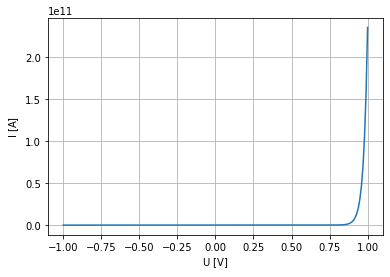

In [61]:
# Set the paramaters.
I_i = 1e-6
U_0 = 0.025

# Create the domain of I(U).
U = np.linspace(-1, 1, num=200)

# Define the function (I(U))
I = I_i*(np.e**(U/U_0) - 1)

# Create the figure and axes objects.
fig, ax = plt.subplots()
ax.set_xlabel('U [$\mathrm{V}$]')
ax.set_ylabel('I [$\mathrm{A}$]')
ax.grid()

# Plot the curve given by I(U).
ax.plot(U, I)


## Semiconductor Zener’s Diode

A circuit symbol and relationship of a semiconductor Zener’s diode are presented in
Fig. 2.12.2, for both ideal and practical diode.

In the case of a **practical Zener's diode**, $I$ as a function of $U$ is -- *i think* -- given by:  

\begin{align*}\tag{2}
    I := I(U) &= I_i\big(e^{U/U_0}-1\big) - I_i\big(e^{-U/U_0}-1\big) \\
     &= I_i\big(e^{U/U_0} - e^{-U/U_0}\big)
\end{align*}     

In [5]:
I = lambda U: (1e-3)*(np.e**(U/0.025) - np.e**(-U/0.025))

In [6]:
I(-0.5)

-485165.19540978974

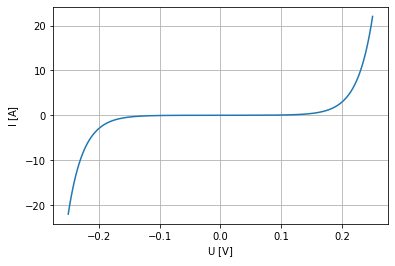

In [7]:
# Create the domain of I(U).
U = np.linspace(-0.25, 0.25, num=200)

# Define the function (I(U))
I = (1e-3)*(np.e**(U/0.025) - np.e**(-U/0.025))

# Create the figure and axes objects.
fig, ax = plt.subplots()
ax.set_xlabel('U [$\mathrm{V}$]')
ax.set_ylabel('I [$\mathrm{A}$]')
ax.grid()

# Plot the curve given by I(U).
ax.plot(U, I)

## Graphical Analysis

### Example 2.12.1
A nonlinear circuit is shown in Fig. 2.12.7. For the given parameters of linear elements: $R_1=10\Omega$, $R_2=5\Omega$, $E_2=12\mathrm{V}$, and nonlinear element relationship presented in Table
2.12.2, find the power supplied by the voltage source.  

![Fig-2.12.7](Figures/Fig-2.12.7.png)

The following PWL $I-U$ relationships for the nonlinear element can be obtained from table (2.12.1):  

\begin{align*}\tag{Ex1.1}
    I &= \frac{1}{60}\,\mathrm{S}\,U \quad &\forall\,U &\in \le 0,6 > \\
    I &= 0.1\mathrm{S}\, U - 0.5\mathrm{A}\quad &\forall\,&U\in \le 6, 10>  \\
    I &= 0.5\mathrm{A} \quad &\forall\,&U\in\le 10, 12>
\end{align*}    

To find the open-circuit voltage, assume that all of the current, denoted as '$I_\mathrm{a}$', flows through the bottom mesh, leaving none for the nonlinear element.  Via KVL and Ohm's Law,  

$$ E_\mathrm{o} = I_\mathrm{a}R_1$$

$$ I_\mathrm{a} = \frac{E_2}{R_1+R_2} = \frac{12\mathrm{V}}{15\Omega} = 0.8\mathrm{A}$$

Thus,
$$ E_\mathrm{o} = 0.8\mathrm{A} \cdot 10\Omega = 8\mathrm{V}$$

To find the short-circuit current of the linear part of the circuit, assume none of the current flows through $R_1$.  Via KVL and Ohm's Law,  

$$ E_2 = R_2 J_\mathrm{s}$$  

$$ J_\mathrm{s} = \frac{12}{5}\,\mathrm{A}$$

Thus,
$$ R_\mathrm{t} = \frac{E_\mathrm{o}}{J_\mathrm{s}} = \frac{10}{3}\Omega$$

Via KVL and Ohm's Law,  

$$ E_\mathrm{o} = R_\mathrm{t}I + U$$

\begin{equation}\tag{Ex1.2}
    I= \frac{E_\mathrm{o} - U}{R_\mathrm{t}} = 0.3\mathrm{S}\,(8\mathrm{V} - U)
\end{equation}    

Now, to find the $Q$-point we must solve for $U$ and $I$ using equations (Ex1.1) and (Ex1.2) subsequently finding the point of intersection between the graphs given by (Ex1.2) and (Ex1.1).

In [8]:
I = lambda U: 0.3*(8-U)

The system of equations is:  

$$ I^\mathrm{Q} = 0.3\mathrm{S}\,(8\mathrm{V} - U^\mathrm{Q})$$

$$ I^\mathrm{Q} = 0.1\mathrm{S}\,U^\mathrm{Q} - 0.5\mathrm{A}$$

$$0.3\mathrm{S}\,(8\mathrm{V} - U^\mathrm{Q}) = 0.1\mathrm{S}\,U^\mathrm{Q} - 0.5\mathrm{A}$$

$$ 0.4\mathrm{S}\,U^\mathrm{Q} = 0.3\cdot 8\mathrm{A} + 0.5\mathrm{A}$$

\begin{equation}\tag{Ex1.3}
    U^\mathrm{Q} = 7.25\mathrm{V}
\end{equation}    

\begin{equation}\tag{Ex1.4}
    I^\mathrm{Q} = 225\mathrm{mA}
\end{equation}    

In [9]:
0.1*7.25 - 0.5

0.2250000000000001

The $Q$-point is the only point at which the laws of circuit theory apply.  Via KCL,  

$$ I_2 = I^\mathrm{Q} + I_1 $$

Via Ohm's Law,  

$$ U^\mathrm{Q} = R_1I_1$$

$$ I_1 = \frac{7.25\mathrm{V}}{10\Omega} = 725\mathrm{mA}$$

Thus,  

$$ I_2 = 950\mathrm{mA}$$

And, the power delivered by $E_2$ is given by:  

$$ P = E_2I_2 = 11.4\mathrm{W}$$

In [10]:
12*0.95

11.399999999999999

## Analysis Based on PWL Approximation

A nonlinear element can be characterized by an analytic function (2.1.4) or by its tabularized
PWL approximation. Each linear segment is located on a straight line described by equation
(2.12.8a) or (2.12.8b).  

\begin{equation}\tag{8a}
    U := U(I) = E_\mathrm{o} + R_\mathrm{t}I
\end{equation}    

\begin{equation}\tag{8b}
    I := I(U) = J_\mathrm{s} + G_\mathrm{t}U
\end{equation}    

This means that a nonlinear element operating at the given linear segment can be replaced by
its Thevenin or Norton equivalent circuit depicted in Fig. 2.5.6 (for simplicity of description
indices in (2.12.8) have been omitted). Then, the PWL approximation based algorithm of
nonlinear circuit analysis can be formulated.

### *Example 2.12.1* – cont.
The PWL approximation based analysis is applied. The tabularized $I-U$relationship (Table
2.12.1) has three segments. These segments are described by the following equations:  

\begin{align*}\tag{Ex1.1}
    \text{I: }\;U &= 60\Omega\,I \\
    \text{II: }\;U&= 10\Omega\,I + 5\mathrm{V} \\
    \text{III: }\;I&= 0.5\mathrm{A}
\end{align*}    

Thevenin or Norton equivalents are presented in Fig. 2.12.10.  

![Fig-2.12.10](Figures/Fig-2.12.10.png)

At first we will substitute the nonlinear element with subcircuit $\mathrm{I}$ and assume that $0\le U \le 6\mathrm{V}$.  

![Fig-2.12.11](Figures/Fig-2.12.11.png)

Recall that:

* $E_2 = 12\mathrm{V}$
* $R_2 = 5\Omega$
* $R_1 = 10\Omega$

Via KCL,  

\begin{equation}\tag{Ex1b.1}
    I_2 = I + I_1
\end{equation}    

Via KVL and Ohm's Law,  

$$10\Omega\,I_1 = 60\Omega\,I$$

\begin{equation}\tag{Ex1b.2}
    I_1 = 6I
\end{equation}    

\begin{equation}\tag{Ex1b.3}
    12\mathrm{V} = 5\Omega \,I_2 + 10\Omega\,I_1
\end{equation}    

Via equations (Ex1b.1) and (Ex1b.3),  


\begin{align*}\tag{Ex1b.4}
    12\mathrm{V} &= 5\Omega\,(I+I_1) + 10\Omega \,I_1 \\
     &= 5\Omega\,I + 15\Omega\,I_1
\end{align*}    

Via equations (Ex1b.4) and (Ex1b.2),  

$$ 12\mathrm{V} = 95\Omega\,I $$

\begin{equation}\tag{Ex1b.5}
    I \approxeq 126.32 \mathrm{mA}
\end{equation}    

Via equation (Ex1b.5) and (Ex1.1), $ U \approxeq 7.58$, which means that equation (Ex1b.5) is inconsistent with the assumption made in the case of subcircuit $\mathrm{I}$, which is that $0\le U \le 6\mathrm{V}$.

Now let's try subcircuit $\mathrm{II}$ and assume that $6\mathrm{V}\le U \le 10\mathrm{V}$.

Equations (Ex1b.1) and (Ex1b.3) still hold true in the case of subcircuit $\mathrm{II}$.  Via KVL and Ohm's Law,  

\begin{equation}\tag{Ex1b.2-II}
    10\Omega\,I_1 = 10\Omega\,I + 5\mathrm{V}
\end{equation}    

Via equations (Ex1b.1) and (Ex1b.2-II),  

$$ 10\Omega\,I_1 = 10\Omega(I_2-I_1) + 5\mathrm{V}$$

\begin{equation}\tag{Ex1b.6}
    20\Omega\,I_1 = 10\Omega\,I_2 + 5\mathrm{V}
\end{equation}    

And, via equations (Ex1b.6) and (Ex1b.3),  

$$ 20\Omega\,I_1 = 24\mathrm{V} - 20\Omega\,I_1 + 5\mathrm{V}$$

$$ 40\Omega\,I_1 = 29\mathrm{V}$$

\begin{equation}\tag{Ex1b.7}
    I_1 = 725\mathrm{mA}
\end{equation}    

In [11]:
29/40

0.725

Via equation (Ex1b.7) and Ohm's Law,  

\begin{equation}\tag{Ex1b.8}
    U = 7.25\mathrm{V}
\end{equation}    

and,
\begin{equation}\tag{Ex1b.9}
    I = 225\mathrm{mA}
\end{equation}    

In [12]:
(7.25-5)/10

0.225

## Analysis Based on Newton-Raphson Iteration Scheme
It is assumed that all nonlinear elements are characterized by analytic functions (2.1.4). In a
close neighborhood of the $Q$-point nonlinear characteristic can be linearized, by means of
Taylor’s expansion (2.12.12), as presented in Fig. 2.12.12.  

\begin{align*}\tag{12}
    I &= I^\mathrm{Q} + (\mathrm{d}I/\mathrm{d}U)^\mathrm{Q}(U - U^\mathrm{Q}) \\
     &= I^\mathrm{Q} + I'(U^\mathrm{Q}) \cdot (U - U^\mathrm{Q})\\
     &= J^\mathrm{Q} + G^\mathrm{Q}U
\end{align*}     

where,
\begin{equation}\tag{12a}
    (\mathrm{d}I/\mathrm{d}U)^\mathrm{Q} = \frac{\mathrm{d}I}{\mathrm{d}U}(U^\mathrm{Q}) = I'(U^\mathrm{Q}) = G^\mathrm{Q}
\end{equation}    

is the **dynamic conductance** at the $Q$-point and  

\begin{equation}\tag{12b}
    J^\mathrm{Q} = I^\mathrm{Q} + G^\mathrm{Q}U^\mathrm{Q}
\end{equation}    

is the short-circuit current at the $Q$-point. Then, for the given $Q$-point, Norton (or Thevenin)
equivalent of each element can be found, as depicted in Fig. 6.12.13.

## Drill Problems

#### Problem 1
1. Calculate the power supplied by the ideal current source $J=2.7\mathrm{mA}$, and powers
    absorbed by the resistor $R=1000\Omega$ and diode given by the $I-U$ characteristic.  
    
![Fig-P.2.12.1](Figures/Fig-P.2.12.1.png)

To find the norton equivalent, first note that:  

\begin{equation}\tag{1.1}
    J_\mathrm{s} = J = 2.7\mathrm{mA}\quad\text{and}\quad R_\mathrm{t}=R=1000\Omega\quad\text{and}\quad E_\mathrm{o} = JR = 2.7\mathrm{V}
\end{equation}    

Via KVL and Ohm's Law,  

$$ E_\mathrm{o} = RI + U$$

\begin{equation}\tag{1.2}
    I = \frac{E_\mathrm{o}-U}{R} = 1\mathrm{mS}\,(2.7\mathrm{V} - U)
\end{equation}    

Now, let $I:=I(U)$.  It then follows that $I(0) = 2.7\mathrm{mA}>0$ and that $I(0.7\mathrm{V}) = 2\mathrm{mA} > 1\mathrm{mA}$, which means that the $Q$-point is $U^\mathrm{Q}=0.7\mathrm{V}$ and $I^\mathrm{Q} = 2\mathrm{mA}$.

The power supplied by $J$ is thus,  

\begin{equation}\tag{1.3}
    P_J = JU^\mathrm{Q} = 1.89\mathrm{mW}
\end{equation}    

In [13]:
0.7*2.7e-3

0.00189

The power absorbed by the resistor and diode are given by:  

\begin{equation}\tag{1.4}
    P_R = \frac{\big(U^\mathrm{Q}\big)^2}{R} = 0.49\mathrm{mW}\quad\text{and}\quad P_\mathrm{D} = U^\mathrm{Q}I^\mathrm{Q} = 1.4\mathrm{mW}
\end{equation}    

In [14]:
(0.7**2)/1000

0.00049

In [15]:
0.7*2e-3

0.0014

#### Problem 2
2. Calculate mesh currents - diode $I-U$characteristic is the same as in Problem 2.12.1.  

![Fig-P.2.12.2](Figures/Fig-P.2.12.2.png)

First, we will solve the **left hand circuit**.  Via KVL, the voltage dropped across both diodes, denoted as '$U$', is given by:  

\begin{equation}\tag{2.1}
    U = U_1 + U_2
\end{equation}    

Recall that:  

\begin{align*}\tag{2.2}
    I &= \frac{1\mathrm{mA}}{0.7\mathrm{V}}\,U_1 \approxeq 1.43\mathrm{mS}\,U_1&\quad&\text{if }0 \le U_1 < 0.7\mathrm{V} \\
    U_1 &= U_2 = 0.7\mathrm{V} &\quad &\text{if } I \ge 1\mathrm{mA}
\end{align*}    

In [16]:
(1e-3)/0.7

0.0014285714285714288

\begin{align*}\tag{2.3}
    U_1&=U_2 = 700\Omega\,I &\quad &\text{if }\; 0\le I < 1\mathrm{mA} \\
    U_1 &= U_2 = 0.7\mathrm{V} &\quad &\text{if } I \ge 1\mathrm{mA}
\end{align*}    

Via equations (2.3) and (2.1),  

$$ U = \begin{cases}\tag{2.4}
1400\Omega\,I &\quad &\text{if }\; 0\le I < 1\mathrm{mA} \\
1.4\mathrm{V} &\quad &\text{if }\; 1 \ge 1\mathrm{mA}
\end{cases}$$

And, solving for $I$ in terms of $U$ in equation (2.4) gives:  


\begin{align*}\tag{2.5}
    I&\approxeq 714.29\mu\mathrm{S}\,U &\quad &\text{if }\; 0\le U < 1.4\mathrm{V} \\
    I &\ge 1\mathrm{mA} &\quad &\text{if }\; U \ge 1.4\mathrm{V}
\end{align*}    


In [17]:
1/1400

0.0007142857142857143

Via equations (2.5), KVL, and Ohm's Law,  

$$ 2.8\mathrm{V} = 1000\Omega\,I + U$$

\begin{equation}\tag{2.6}
    I = \frac{2.8\mathrm{V} - U}{1000\Omega} = 1\mathrm{mS}\,(2.8\mathrm{V} - U)
\end{equation}    

Let $I:=I(U)$.  It then follows that $I(0) = 2.8\mathrm{mA} > 0$ and that $I(1.4\mathrm{V}) = 1.4\mathrm{mA}>1\mathrm{mA}$.  Thus, the $Q$-point is $U^\mathrm{Q} = 1.4\mathrm{V}$ and $I^\mathrm{Q} = 1.4\mathrm{mA}$.

Next, we will solve the **right hand circuit**.  Via KVL and Ohm's Law,  

$$ 2.7\mathrm{V} = 1000\Omega\,I + U$$

\begin{equation}\tag{2.r.1}
    I = \frac{2.7\mathrm{V} - U}{1000\Omega} = 1\mathrm{mS}\,(2.7\mathrm{V} - U)
\end{equation}    

Via KCL and the $I-U$ characteristic of both diodes,  

\begin{align*}\tag{2.r.2}
    I &=  \frac{2\mathrm{mA}}{0.7\mathrm{V}}\,U &\quad &\text{if }\; 0\le U < 0.7\mathrm{V} \\
    I &= 2\mathrm{mA} &\quad &\text{if }\; U=0.7\mathrm{V}
\end{align*}    

Thus, $U^\mathrm{Q} = 0.7\mathrm{V}$ and $I^\mathrm{Q} = 2\mathrm{mA}$.  Finally, the right hand mesh current is equal to $1\mathrm{mA}$ while the left hand mesh current is equal to $2\mathrm{mA}$.

#### Problem 3
3. Find Thevenin and Norton equivalents for both segments of practical sources given by the
    presented $I-U$ relationships.  
    
![Fig-P.2.12.3](Figures/Fig-P.2.12.3.png)

For the **left hand** practical source:  

\begin{align*}\tag{3.1}
    \text{I: }\;I &= 10\mathrm{A} &\quad &\text{if }\; 0\le U <20\mathrm{V} \\
    \text{II: }\;I &= -0.5\mathrm{S}\,U + 20\mathrm{A} &\quad &\text{if }\; 20\mathrm{V} \le U < 40\mathrm{V} \\
    \text{III: }\;I &= 0 &\quad &\text{if }\; U \ge 40\mathrm{V}
\end{align*}    

In the $\mathrm{I}$ case, Norton equivalent consists only of an ideal current source of $J=10\mathrm{A}$.  In the $\mathrm{II}$ case, the Norton equivalent consists of an ideal current source of $J=20\mathrm{A}$ in parallel with a conductance of $G_\mathrm{t}=0.5\mathrm{S}$ or a resistance of $R_\mathrm{t}=2\Omega$;  The Thevenin equivalent is of course an ideal voltage source of $E=JR_\mathrm{t} = 40\mathrm{V}$ in series with a resistance of $R_\mathrm{t}=2\Omega$.  Finally, in the $\mathrm{III}$ case, there is no Norton equivalent, nor -- *i think* -- a Thevenin equivalent.

For the **right hand** practical source:  

\begin{align*}\tag{3.2}
    \text{I: }\; I &= 4\mathrm{A}-\frac{1}{3\Omega}\,U &\quad &\text{if }\; 0\le U < 6\mathrm{V} \\
    \text{II: }\;U &= 6\mathrm{V} &\quad &\text{if }\; 0 < I \le 2\mathrm{A} \\
    \text{III: }\; I &= 0 &\quad &\text{if }\; U\ge 6\mathrm{V}
\end{align*}    

The Thevenin equivalent of the $\mathrm{I}$ case is an ideal voltage source of $E=4\mathrm{A}\cdot 3\Omega = 12\mathrm{V}$ in series with a resistance of $R_\mathrm{t} = 3\Omega$.

#### Problem 4
4. Practical sources of Problem 2.12.3 are loaded by a resistor. Find the power
    absorbed.

For the **left hand** practical source:  In the $\mathrm{I}$ case, the power absorbed by the load, denoted as '$P_\mathrm{l}$' is:  

$$ P_\mathrm{l} = I^2R = 100\mathrm{A}^2 2\Omega = 200\mathrm{W}$$

In the $\mathrm{II}$ case,  via KVL and Ohm's Law,    

$$ 40\mathrm{V} = 4\Omega I$$

$$ I = 10\mathrm{A}$$

and
$$ P_\mathrm{l} = 200\mathrm{W}$$

In the $\mathrm{III}$ case,  

$$ P_\mathrm{l} = 0\mathrm{W}$$

Now, for the **right hand** practical source:  In the $\mathrm{I}$ case, via KVL and Ohm's Law,  

$$ 12\mathrm{V} = 5\Omega\,I$$

$$ I = \frac{12}{5}\,\mathrm{A}$$

$$ P_\mathrm{l} = I^2 2\Omega = \frac{288}{25}\,\mathrm{W}$$

In the $\mathrm{II}$ case,  

$$ P_\mathrm{l} = \frac{36\mathrm{V}^2}{2\Omega} = 18\mathrm{W}$$

Finally, in the $\mathrm{III}$ case,  

$$ P_\mathrm{l} = 0$$

#### Problem 5

5. Draw the total $I-U$ relationships for: a) ideal (2.12.1a), b) practical (2.12.1c) diodes.  

![Fig-P.2.12.5](Figures/Fig-P.2.12.5.png)

For the **top left** hand circuit:  

Via KVL,  

\begin{equation}\tag{5.tl.4}
    U + E + U_2 = 0
\end{equation}    

and,
\begin{equation}\tag{5.tl.3}
    U = U_1
\end{equation}    

Thus,
\begin{equation}\tag{5.tl.1}
    E = -(U_1+U_2)
\end{equation}    

Via KCL,  

\begin{equation}\tag{5.tl.2}
    I = I_1 - I_2
\end{equation}    

In the case of an **ideal diode**:  

\begin{align*}\tag{5.1}
    I_i&=0 &\quad &\text{if }\; U_i< 0 &\quad &\text{(inverse polarization)} \\
    U_i&=0 &\quad &\text{if }\; I_i\ge0 &\quad &\text{(forward polarization)}
\end{align*}    

For all $i\in\{1,2\}$.

Via equations (5.tl.3) and (5.1),  

\begin{align*}\tag{5.tl.5}
    U &= 0 &\quad &\text{if }\; I_1 \ge 0 \\
    I_1 &= 0 &\quad &\text{if }\; U< 0
\end{align*}    

As is stated in equation (5.tl.5), if $U<0$ then $I_1=0$ and, via equation (5.tl.2), if $I_1=0$ then $I=-I_2$.  Thus, if $U<0$ (inclusive) or $I_1=0$ then $I=-I_2$.  In other words, if the voltage dropped across the terminals, denoted as emboldened dots in the circuit diagram, of the subcircuit is negative (inclusive) or the current flowing through the top branch is equal to zero then the current flowing through the top branch is equal to zero, implying the current $I$ *exits* the left hand terminal instead of entering through it.

As is also stated in equation (5.tl.5), if $I_1\ge 0$ then $U,U_1=0$, which, via equation (5.tl.4) implies that $U_2=-E$.  If $E>0$ and $U_2=-E$ then $U_2<0$.  Via equation (5.1), if $U_2<0$ then $I_2=0$.  Therefore, if $I_1\ge0$ and $E>0$ then $I_2=0$.  In other words, if the current flowing through the top branch is non-negative (inclusive) or the voltage dropped across the terminals of the subcircuit is equal to zero then the current flowing through the bottom branch is equal to zero, implying that the current $I$ *enters* through the left hand terminal of the subcircuit.

Via the two propositions of the previous two paragraphs, a current may only flow through one branch of the subcircuit at a time.

In the case of a **practical diode**:  

\begin{equation}\tag{5.2}
    \text{a:}\;I_1 = 1\mathrm{mA}(e^{U_1/25\mathrm{mV}} - 1) \quad\quad\text{and}\quad\quad \text{b:}\;I_2 = 1\mathrm{mA}(e^{U_2/25\mathrm{mV}} - 1)
\end{equation}    

Via equations (5.2), (5.tl.2), (5.tl.3), and (5.tl.4),  

$$ I = 1\mathrm{mA}(e^{U/25\mathrm{mV}} - 1) - 1\mathrm{mA}(e^{-(E+U)/25\mathrm{mV}} - 1)$$

\begin{equation}\tag{5.tl.6}
    I :=I(U\vert E)= 1\mathrm{mA}\cdot e^{U/25\mathrm{mV}}\big(1 - e^{-(E+1)/25\mathrm{mV}}\big)
\end{equation}    

Now, to solve the **top right** subcircuit:  Via KVL,  

\begin{equation}\tag{5.tr.1}
    E = U + U_\mathrm{D}
\end{equation}    

And, via KVL and Ohm's Law,  

\begin{equation}\tag{5.tr.2}
    U_\mathrm{D} = RI_R
\end{equation}    

Note that herein, '$U_\mathrm{D}$' denotes the voltage dropped across the diode.

Via KCL,  

\begin{equation}\tag{5.tr.3}
    I = I_R + I_\mathrm{D}
\end{equation}    

In the case of an **ideal diode**:  

\begin{align*}\tag{5.tr.4}
    U_\mathrm{D} &= 0 &\quad &\text{if }\; I_\mathrm{D} \ge 0 \\
    I_\mathrm{D} &= 0 &\quad &\text{if }\; U_\mathrm{D}< 0
\end{align*}    

Via equation (5.tr.2) and (5.tr.3),  

\begin{equation}\tag{5.tr.5}
    I = GU_\mathrm{D} + I_\mathrm{D}
\end{equation}    

Via equations (5.tr.5) and (5.tr.4),  if $I_\mathrm{D} = I - I_R = I - GU_\mathrm{D} = I - G(E-U)\ge 0$ then $I=I_\mathrm{D}\ge 0$ and $E=U$.

Furthermore, if $U_\mathrm{D}<0$ then $I=GU_\mathrm{D} = G(E-U) < 0$.

In the case of a **practical diode**:  

Via equations (1b), (5.tr3), and (5.tr.2),  

\begin{equation}\tag{5.tr.6}
    I = GU_\mathrm{D} + 1\mathrm{mA}\big(e^{U_\mathrm{D}/25\mathrm{mV}} - 1\big)
\end{equation}    

Finally, via equations (5.tr.6) and (5.tr.1),  

\begin{equation}\tag{5.tr.7}
    I := I(U\vert E, G) = G(E-U) + 1\mathrm{mA}\big(e^{(E-U)/25\mathrm{mV}} - 1\big)
\end{equation}    

In [18]:
def I_gen(E, R):
    G = 1/R
    return lambda U: G*(E-U) + (1e-3)*(np.e**((E-U)/0.025) - 1)

In [19]:
I = I_gen(5, 2)
I(4.8)

3.0799579870417486

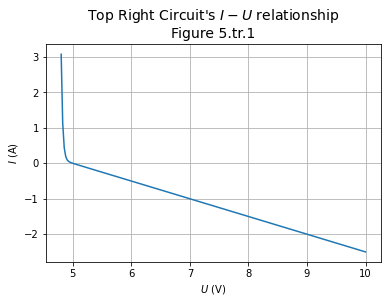

In [20]:
# Set the parameter (E).
E = 5
R = 2
G = 1/R

# Create the domain (U).
U = np.linspace(4.8, 10, num=200)

# Define the function that maps U to I.
I = G*(E-U) + (1e-3)*(np.e**((E-U)/0.025) - 1)

# Create the figure and axes objects.
fig, ax = plt.subplots()
# fig.suptitle('Fig-5.tr.1', x=0.25,y=0.02, va = 'bottom', size=11)
ax.set_title('Top Right Circuit\'s $I-U$ relationship\nFigure 5.tr.1', size=14)
ax.set_xlabel('$U$ ($\mathrm{V}$)')
ax.set_ylabel('$I$ ($\mathrm{A}$)')
ax.grid()

# Plot the I-U relationship
ax.plot(U, I)

In [21]:
'suptitle' in dir(fig)

True

In [22]:
fig.suptitle??

When the subcircuit that is characterized by the above $I-U$ relationship is loaded by a resistance, it practically acts as a practical voltage source of $E$, the same $E$ that is a characteristic of the top right subcircuit and a parameter of the function that gives the curve in the above figure.  

To demonstrate this, suppose that the top right subcircuit is connected in series with a resistance of $R_\mathrm{l}=5\Omega$ (i.e. loaded by a resistance of $R_\mathrm{l}=5\Omega$).  Assuming the subcircuit *actually is* an ideal voltage source of $E$,  via KVL and Ohm's Law,  

$$ E = R_\mathrm{l}I = U = 5\mathrm{V}$$

\begin{equation}\tag{5.tr.8}
    I = G_\mathrm{l}E = 0.2\mathrm{S}\cdot 5\mathrm{V} = 1\mathrm{A}
\end{equation}    

While I am note sure how to solve for $U$ in terms of $I$ in equation (5.tr.7), according to the plot in the above figure, $U$ is not much less $E=5\mathrm{V}$ when $I=1\mathrm{A}$.

In general, via equation (5.tr.8) and the assumption that $G_\mathrm{l}>0$, $I>0$, which implies that: in the case of a *practical diode*, via the $I-U$ relationship shown in figure (5.tr.1), $U\approxeq E$ and $U< E$;  And, in the case of an *ideal diode*, $E=U$.

When the right hand subcircuit is load by an active element whose Thevenin equivalent is characterized by $R_\mathrm{t}$ and $E_\mathrm{o}$, where $E_\mathrm{o}<E$, the right hand subcircuit acts as a practical voltage source of $E$.  

To demonstrate this, suppose that the top right subcricuit is load by an active element whose Thevenin equivalent is characterized by $R_\mathrm{t}=5\Omega$ and $E_\mathrm{0}=3.3\mathrm{V}$.  Assuming the top right subcircuit is an ideal voltage source of $E=5\mathrm{V}$, via KVL and Ohm's Law,  

$$ E = R_\mathrm{t}I + E_\mathrm{o}$$

\begin{align*}\tag{5.tr.9}
    I &= G_\mathrm{t}(E - E_\mathrm{o}) \\
     &= 0.2\mathrm{S}(5\mathrm{V} - 3.3\mathrm{V}) = 0.2\mathrm{S}\cdot 1.7\mathrm{V} = 340\mathrm{mA}
\end{align*}     

As one should be able to tell by eyeballing the plot found in figure (5.tr.1), when $I=340\mathrm{mA}>0$, $U\approxeq E = 5\mathrm{V}$ and $U<E=5\mathrm{V}$.

In general, assuming $E_\mathrm{o}<E$, via equation (5.tr.9), $I>0$, and:
* in the case of a *practical diode*, if $I>0$ then $U\approxeq E$ and $U<E$;
* and, in the case of an *ideal diode*, if $I>0$ then $U=E$.

Finally, assuming $E_\mathrm{o} > E$, via equation (5.tr.9), $I < 0$.  As the plot in figure (5.tr.1) shows, when $I<0$, the top right subcircuit practically acts as an active element consisting of $E$ in series with $R$.  This goes hand in hand with the notion that, as $U$ gets larger, the exponential term of the identity of $I$ found in equation (5.tr.7) becomes increasingly more insignificant, leaving $I$ with a practical identity of $G(E-U)$.

Now, we shall solve for $U$ in terms of $I$ in equation (5.tr.7) -- note that this is just an attempt.  It appears that the identity of $I$ in equation (5.tr.7) is the solution to a first order differential equation, with $I$ as the dependent variable and $U$ as the independent variable.  

\begin{equation}\tag{5.tr.10}
    a\,\frac{\mathrm{d}I}{\mathrm{d}U} + bI = P(U)
\end{equation}    

where $a$ and $b$ are the coefficients of the auxiliary equation (AE),  

\begin{equation}\tag{5.tr.10a}
    -a\,\frac{1}{25\mathrm{mV}} + b = 0
\end{equation}    

and $P(U)$ is a linear function of $U$ whose definition we will find after finding $I'(U)$.  

\begin{equation}\tag{5.tr.11}
    I'(U) = -G - \frac{1\mathrm{mA}}{25\mathrm{mV}}\,e^{(E-U)/25\mathrm{mV}} = -\left(G+\frac{1}{25}\,\mathrm{S}\cdot e^{(E-U)/25\mathrm{mV}}\right) = -\big(G + 40\mathrm{mS}\cdot e^{(E-U)/25\mathrm{mV}}\big)
\end{equation}    

And,
\begin{equation}\tag{5.tr.10b}
    P(U) = a\big(G(E-U) - 1\mathrm{mA}\big) -bG 
\end{equation}    

In [23]:
1/25

0.04

![Fig-P.2.12.5](Figures/Fig-P.2.12.5.png)

For the **bottom left** subcircuit:  Via KVL,  

\begin{equation}\tag{5.bl.1}
    \text{a:}\;U = U_J \quad\quad \text{and} \quad\quad  \text{b:}\;U_J = U_R \quad \quad \text{and}\quad\quad\text{c:}\;U_R = U_\mathrm{D}
\end{equation}    

And, via equation (5.bl.1b) and (5.bl.1c) and Ohm's Law,  

\begin{equation}\tag{5.bl.1}
    \text{b:}\;U_J = RI_R \quad \quad \text{and}\quad \quad \text{c:}\;U_\mathrm{D} = RI_R
\end{equation}    

Via equations (5.bl.1a) and (5.bl.1b) and equivalence principle,  

\begin{equation}\tag{5.bl.2}
    U = U_R=RI_R
\end{equation}    

Via KCL,  

\begin{equation}\tag{5.bl.3}
    J + I = I_R + I_\mathrm{D}
\end{equation}    

Via equations (5.bl.3) and (5.bl.2),  

\begin{equation}\tag{5.bl.4}
    J + I = GU + I_\mathrm{D}
\end{equation}    

Via equations (5.bl.3) and (5.bl.1c) and Ohm's Law,  

\begin{equation}\tag{5.bl.5}
    J + I = GU_\mathrm{D} + I_\mathrm{D}
\end{equation}    

In the case of an **ideal diode**:  Recall that:  

\begin{align*}\tag{5.bl.6}
    U_\mathrm{D} &= 0 &\quad &\text{if }\; I_\mathrm{D} \ge 0 \\
    I_\mathrm{D} &= 0 &\quad &\text{if }\; U_\mathrm{D}< 0
\end{align*}    

Via equations (5.bl.4) and (5.bl.6), if $I + J\ge GU$ then $U_\mathrm{D}, U= 0$.  Thus, if $I\ge -J$ then $U=0$.

Furthermore, if $U<0$ then $GU = I+J $ and $I<-J$.

In the case of a **practical diode**:  

\begin{equation}\tag{5.bl.7}
    I := I(U\vert G, J)= GU - J + 1\mathrm{mA}\big(e^{U/25\mathrm{mV}} - 1\big)
\end{equation}    

For the **bottom right** subcircuit:  Via KVL and Ohm's Law,  

\begin{equation}\tag{5.br.1}
    \text{a: }\; U = -U_J \quad\quad \text{and}\quad \quad \text{b: }\; U = RI_R + U_\mathrm{D}
\end{equation}    

Via KCL,  

\begin{equation}\tag{5.br.2}
    \text{a: }\;I = J + I_R \quad \quad \text{and}\quad \quad \text{b: }\; I_R = I_\mathrm{D}
\end{equation}    

Via equations (5.br.2a) and (5.br.2b),  

\begin{equation}\tag{5.br.2c}
    I = J + I_\mathrm{D}
\end{equation}    

Via equations (5.br.1b) and (5.br.2a),  

\begin{equation}\tag{5.br.3}
    I = J + G(U-U_\mathrm{D})
\end{equation}    

or, to put it another way,  

$$ U - U_\mathrm{D} = R(I-J)$$

\begin{equation}\tag{5.br.3}
    U_\mathrm{D} = U - R(I-J)
\end{equation}    

In case of an **ideal diode**:  

\begin{align*}\tag{5.br.4}
    \text{a: }\; U_\mathrm{D} &= 0 &\quad &\text{if }\; I_R \ge 0 \\
    \text{b: }\; I_R &= 0 &\quad &\text{if }\; U_\mathrm{D}< 0
\end{align*}    

Via equations (5.br.4a) and (5.br.1b), 

\begin{equation}\tag{5.br.5a}
    I_R \ge 0 \implies U = RI_R \ge 0\mathrm{V}
\end{equation}    

Via the statement of reason (5.br.5a) and equation (5.br.2a),  

\begin{equation}\tag{5.br.6a}
    I\ge J \implies U = R(I-J) \ge 0\mathrm{V}
\end{equation}    

Via equations (5.br.4b) and (5.br.3),  

\begin{equation}\tag{6.br.5b}
    U < R(I-J) \implies I_R = 0
\end{equation}    

Via statement of reason (5.br.5b) and equation (5.br.2a),  

\begin{equation}\tag{5.br.6b}
    U < R(I-J) \implies I=J
\end{equation}    

In the case of a **practical diode**:  



\begin{equation}\tag{5.br.7}
    I = J + 1\mathrm{mA}(e^{U_\mathrm{D}/25\mathrm{mV}} - 1)
\end{equation}    

$$ e^{U_\mathrm{D}/25\mathrm{mV}} - 1 = \frac{1}{1\mathrm{mA}}\,(I - J)$$

$$\frac{U_\mathrm{D}}{25\mathrm{mV}} = \log\left( \frac{I-J}{1\mathrm{mA}} + 1\right ) = \log\frac{I-J+1\mathrm{mA}}{1\mathrm{mA}} = \log(I-J+1\mathrm{mA}) - \log 1\mathrm{mA}$$

$$ U_\mathrm{D} = 25\mathrm{mV}\,\big(\log(I-J+1\mathrm{mA}) - \log 1\mathrm{mA}\big)$$

\begin{equation}\tag{5.br.8}
    U := U(I \vert J, R) = 25\mathrm{mV}\,\big(\log(I-J+1\mathrm{mA}) - \log 1\mathrm{mA}\big) + R(I-J)
\end{equation}    

To avoid a domain error, the following inequality must be satisfied,  

$$ I-J+1\mathrm{mA} > 0$$

\begin{equation}\tag{5.br.8a}
    I > J - 1\mathrm{mA}
\end{equation}    

In [39]:
def U_gen(J, R):
    return lambda I: 0.025*(np.log(I-J+0.001) - np.log(0.001)) + R*(I-J)

In [52]:
U = U_gen(1, 5)
np.log(0.9991)

-0.0009004052431641551

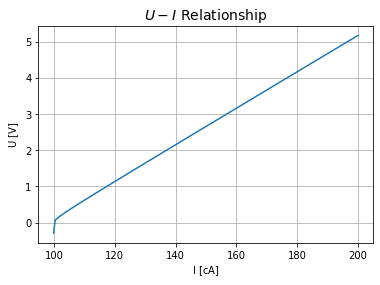

In [55]:
# Set the parameters.
R = 5
J = 1

# Create the domain of U(I| J, R)
I = np.linspace(0.99900001,2, num=200)

# Define U(I| J, R)
U = 0.025*(np.log(I-J+0.001) - np.log(0.001)) + R*(I-J)

# Create the figure and axes objects.
fig, ax = plt.subplots()
ax.set_title('$U-I$ Relationship', size=14)
ax.set_xlabel('I [$\mathrm{cA}$]')
ax.set_ylabel('U [$\mathrm{V}$]')
ax.grid()

# Plot the U-I relationship given by U(I| J, R).
ax.plot(I*100, U)

As can be inferred from the above $U-I$ relationship, when $I$ is roughly less then $J=1\mathrm{A}$ or when $U$ is negative, the bottom right subcircuit practically acts as a practical current source of $J=1\mathrm{A}$.

#### Problem 6
6. Find the series resistance $R$, so that $10\mathrm{V}$ Zener’s diode operates at $I_\mathrm{D}=10 \mathrm{mA}$ current. Supply
    voltage is $12.5 \mathrm{V}$, load resistance is $R_\mathrm{l}=1000\Omega$ .  
    
![Fig-P.2.12.6](Figures/Fig-P.2.12.6.png)

Via KVL and Ohm's Law,  

$$ U - RI - 10\mathrm{V} = 0$$

$$U = 12.5\mathrm{V}= RI + 10\mathrm{V}$$

Thus
\begin{equation}\tag{6.1}
    RI = 2.5\mathrm{V}
\end{equation}    

$$R_\mathrm{l}I_\mathrm{l}= 1000\Omega\, I_\mathrm{l} = 10\mathrm{V}$$

\begin{equation}\tag{6.2}
    I_\mathrm{l} = 10\mathrm{mA}
\end{equation}    

Via KCL,  

$$ I - I_\mathrm{D} - I_\mathrm{l} = I - 10\mathrm{mA} - 10\mathrm{mA}  = 0$$

\begin{equation}\tag{6.3}
   I = 20\mathrm{mA}
\end{equation}    

Via equations (6.3) and (6.1),  

\begin{equation}\tag{6.4}
    R = \frac{2.5\mathrm{V}}{20\mathrm{mA}} = 125\Omega
\end{equation}    

In [62]:
2.5/0.02

125.0

#### Problem 7
7. In Problem 2.12.6 circuit, find the acceptable range of load resistance so that the diode
    current ranges from $5\mathrm{mA}$ to $15 \mathrm{mA}$.

$$ R_\max = \frac{2.5\mathrm{V}}{15\mathrm{mA}} \approxeq 166.67\Omega$$

In [63]:
2.5/0.015

166.66666666666669

$$ R_\min = \frac{2.5\mathrm{V}}{25\mathrm{mA}} = 100\Omega$$

#### Problem 8 
8. Find the coordinates of the nonlinear element $Q$ point.